# Final Project: Machien Learning Classification for Cardiovascular Risk Factor Analysis and Detection

**Autor:** Juan Francisco Rodríguez

**Date:** 13/08/2024

## Table of Contents

* Introduction
* Exploratory Data Analysis
    * Data Overview
    * Formatting Data
    * Correlation Between Features
    * Conclusion
* Applying Machine Learning Models
    * How to proceed
    * Logistic Regression
    * K Nearest Neighbors
    * Support Vector Machines
    * Decision Trees
* Visualizing Models
    * ROC Curves
    * Confusion Matrix
    * Error Metrics
    * To conclude

## Introduction

In this final project, I will explore some risk factors for cardiovascular problems and apply some of the machine learning models studied in the course to predict or prevent heart failure. The dataset for this work was obtained from the *Kaggle* website and can be found [here](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).

Let's briefly discuss the problem. Cardiovascular diseases (CVD) are the leading cause of death worldwide, accounting for about 31\% of all deaths. Of these, 4 out of 5 deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. People with cardiovascular disease or who are at high cardiovascular risk need early detection.

This dataset, although small, contains some of the most important features that can be used to predict possible heart disease.

## 1. Exploratory Data Analysis

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Data Overview

Before applying any model, it is important to perform exploratory data analysis to understand the nature of the data and make better use of machine learning.

The features of our dataset are:

- **Age**: age of the patient in years.
- **Sex**: sex of the patient: male (M) or female (F).
- **Chest Pain Type**: It can be:
    - TA: Typical Angina.
    - ATA: Atypical Angina.
    - NAP: Non-Anginal Pain.
    - ASY: Asymptomatic.
- **Resting BP**: resting blood presure, in $mmHg$.
- **Cholesterol:** serum cholesterol in $mm/dl$.
- **Fasting BS**: fasting blood sugar. It is 1 if its over 120 mg/dl; and is 0 otherwise.
- **Resting ECG**: resting electrocardiogram results. It can be:
    - Normal.
    - ST: having ST-T wave abnormality.
    - LVH: showing probable or definite left ventricular hypertrophy by Estes's criteria.
- **Max HR**: maximum heart rate achieved. It a numeric value between 60 and 202.
- **Exercise Angina**: exercise-induced angina, yes (Y) or no (N).
- **Oldpeak**: Numeric value of the ST depression. 
- **ST Slope**: the slope of the peak exercise ST segment. It can be:
    - Up: upsloping.
    - Flat.
    - Down: downsloping.
- **Heart Disease**: Output class: 1 if the patient has a heart disease, and 0 if the patient has a normal health.

___

We can load the data, previously downloaded as `heart.csv`, using Pandas. With the `.head()` and `.info()` methods we can get an overview of the dataset.

In [2]:
df = pd.read_csv("heart.csv")
display(df.head())
print("Data Info:")
df.info()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Here, ``HeartDisease`` and ``FastingBS`` have ``int64`` dtype, but they are actually categorical variables. So we have 12 features, where the numerical ones are Age, RestingBP, Cholesterol, MaxHR and Oldpeak; and the categorical ones are Sex, ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope and HeartDisease. It is obvious that the target variable will be ``HeartDisease``.

We note that we have 12 columns (features) and 918 rows (samples). Also, we don't have any `nan` values, so the data is already clean.

In [3]:
# List of columns types:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']

Let's see how the data is distributed. For numerical data, we can use histograms, while we can look at categorical data with pie charts. For this, we can use `matplotlib.pyplot` and `seaborn` libraries.

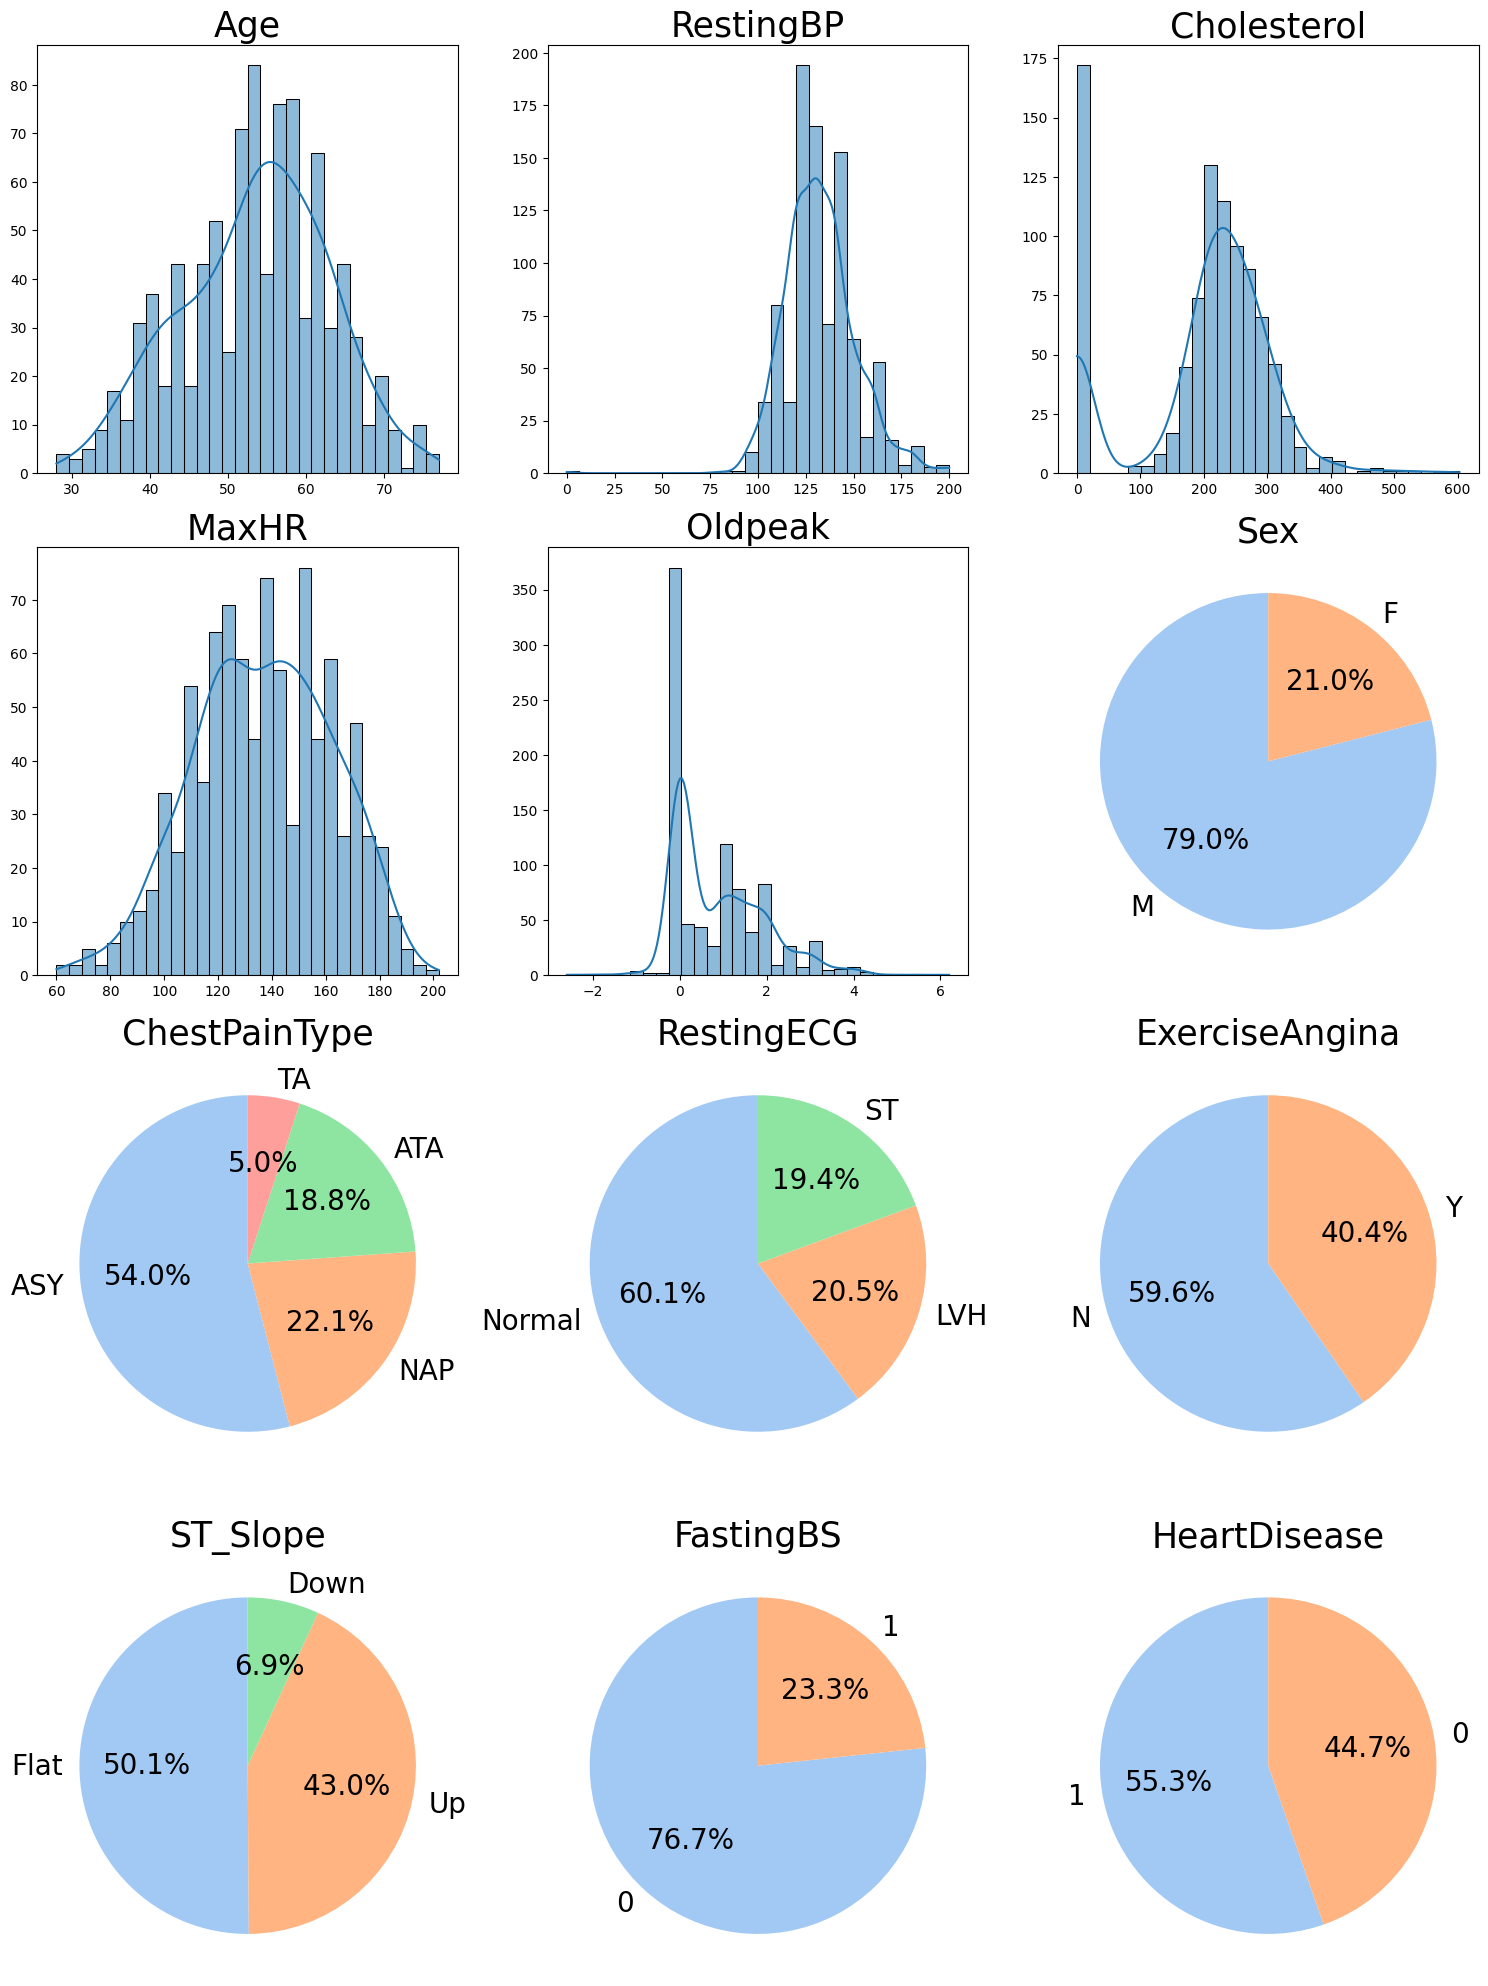

In [4]:
# Creating the axes
fig, axes = plt.subplots(4, 3, figsize=(15, 20))

# Numerical Columns
for i, col in enumerate(num_cols):
    sns.histplot(df[col],
                 bins = 30,
                 kde = True,
                 ax = axes[i//3, i%3])
    axes[i//3, i%3].set_title(col, fontsize = 25)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('')

# Categorical Columns
for i, col in enumerate(cat_cols):
    data = df[col].value_counts()
    axes[(i+len(num_cols))//3, (i+len(num_cols))%3].pie(data,
                                                        labels = data.index,
                                                        autopct = '%1.1f%%',
                                                        startangle = 90,
                                                        colors = sns.color_palette('pastel'),
                                                        textprops = {'fontsize': 20})
    axes[(i+len(num_cols))//3, (i+len(num_cols))%3].set_title(col, fontsize = 25)


plt.tight_layout()
#plt.savefig('final_chart.png', format='png', dpi=300)
plt.show()

We can see that numerical features follow a normal type distribution, with a slight skewness in some cases. While categorical variables have majority categories, but they are not very unbalanced.

For the numerical features, we can also use the ``.describe()`` method to obtain a statistical summary:

In [5]:
print("Numerical features summary:")
display(df[num_cols].describe())

Numerical features summary:


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


### 1.2 Formating Data

Now, let's normalize the numerical data and encode the categorical features into numerical values.

Normalizing data is an important step in order to make comparisons and extract correlations between the features. Since most of the numerical values are positive, we can use the Minimum-Maximum scaler to scale the data into the $[0,1]$ range. So we use the `MinMaxScaler` from the `preprocessing` module of `sklearn`.

In [6]:
from sklearn.preprocessing import MinMaxScaler
## Crating the scaler instance:
scaler = MinMaxScaler()
## Scaling the features
df_normalized = pd.DataFrame()
df_normalized[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] = scaler.fit_transform(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])
print('Scaled Data:')
display(df_normalized.head())

Scaled Data:


,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.244898,0.70,0.479270,0.788732,0.295455
1,0.428571,0.80,0.298507,0.676056,0.409091
2,0.183673,0.65,0.469320,0.267606,0.295455
3,0.408163,0.69,0.354892,0.338028,0.465909
4,0.530612,0.75,0.323383,0.436620,0.295455


In order to compare categorical features, is necesary to transform them into numerical values. The library `sklearn` provides many encoders based on different criteria. It's important to understand the nature of this categories.

Looking at the data, we can see that ``Sex`` and ``ExerciseAngina`` are binary and cannot be ordered, so we can use `OneHotEncoder`.

The features ``ChestPainType`` and ``RestingECG`` have 4 and 3 categories respectively, but them can't be ordered, so it is not a good idea to encode them using numerical values $0,1,2,\dots$; the best way to proceed is using the `OneHotEncoder` again, but it will create new features, one for each category.

Finally, ``ST_Slope`` have more than $2$ categories, but the can be sorted as `Down` < `Flat` < `Up`. So we can use an ordinal encoder for it, such as `OrdinalEncoder` from the `preprocessing` module.

In [7]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
## Creating the instances
onehot_encoder = OneHotEncoder(sparse_output=False)
ordinal_encoder = OrdinalEncoder(categories=[['Down', 'Flat', 'Up']])
## Encoding 
encoded_categorical = onehot_encoder.fit_transform(df[['Sex', 'ChestPainType', 'RestingECG']])
df_encoded = pd.DataFrame(encoded_categorical,
                          columns=onehot_encoder.get_feature_names_out(['Sex', 'ChestPainType', 'RestingECG']))
df_encoded['STSlope_encoded'] = ordinal_encoder.fit_transform(df[['ST_Slope']])
print("Encoded Categories:")
display(df_encoded.head())

Encoded Categories:


,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,STSlope_encoded
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0


Finally, we can join all the features into a final dataframe.

In [8]:
df_final = pd.concat([df_normalized, df_encoded], axis=1)
# Adding the target column
df_final['HeartDisease'] = df['HeartDisease']
display(df_final.head())

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,STSlope_encoded,HeartDisease
0,0.244898,0.70,0.479270,0.788732,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0
1,0.428571,0.80,0.298507,0.676056,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1
2,0.183673,0.65,0.469320,0.267606,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0
3,0.408163,0.69,0.354892,0.338028,0.465909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
4,0.530612,0.75,0.323383,0.436620,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0


In [231]:
df_final[["STSlope_encoded"]] = scaler.fit_transform(df_final[["STSlope_encoded"]])
df_final.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,STSlope_encoded,HeartDisease
0,0.244898,0.70,0.479270,0.788732,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,0.428571,0.80,0.298507,0.676056,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5,1
2,0.183673,0.65,0.469320,0.267606,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0
3,0.408163,0.69,0.354892,0.338028,0.465909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,1
4,0.530612,0.75,0.323383,0.436620,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0


### 1.3 Correlation Between Features

We can calculate the correlations between the independent variables and show them using different plots. Also, we can calculate their correlation with the target variable. This can give us an overview of how well-chosen the features are and how prediction models might behave.

Pandas provides a method to calculate the matrix directly with the DataFrame.

In [232]:
corr_matrix = df_final[df_final.columns[:-1]].corr()
new_headers = ['Age', 'RBP', 'Cholest', 'MHR', 'Oldpeak', 'F', 'M',
               'ASY', 'ATA', 'NAP','TA', 'LVH', 'Normal','ST', 'STSlope']
corr_matrix.columns = new_headers
corr_matrix.index = new_headers
corr_matrix.head()

,Age,RBP,Cholest,MHR,Oldpeak,F,M,ASY,ATA,NAP,TA,LVH,Normal,ST,STSlope
Age,1.000000,0.254399,-0.095282,-0.382045,0.258612,-0.055750,0.055750,0.166607,-0.218165,-0.011335,0.032042,0.145727,-0.230566,0.136798,-0.268264
RBP,0.254399,1.000000,0.100893,-0.112135,0.164803,-0.005133,0.005133,0.048824,-0.046153,-0.041348,0.049855,0.053166,-0.116851,0.090447,-0.075162
Cholest,-0.095282,0.100893,1.000000,0.235792,0.050148,0.200092,-0.200092,-0.120531,0.150954,-0.006634,0.017365,0.177077,-0.038470,-0.133106,0.111471
MHR,-0.382045,-0.112135,0.235792,1.000000,-0.160691,0.189186,-0.189186,-0.354963,0.253735,0.134580,0.100025,0.125793,0.023801,-0.157879,0.343419
Oldpeak,0.258612,0.164803,0.050148,-0.160691,1.000000,-0.105734,0.105734,0.280026,-0.262124,-0.106212,0.032231,0.086794,-0.116719,0.055958,-0.501921


We can plot the results into a heatmap graph:

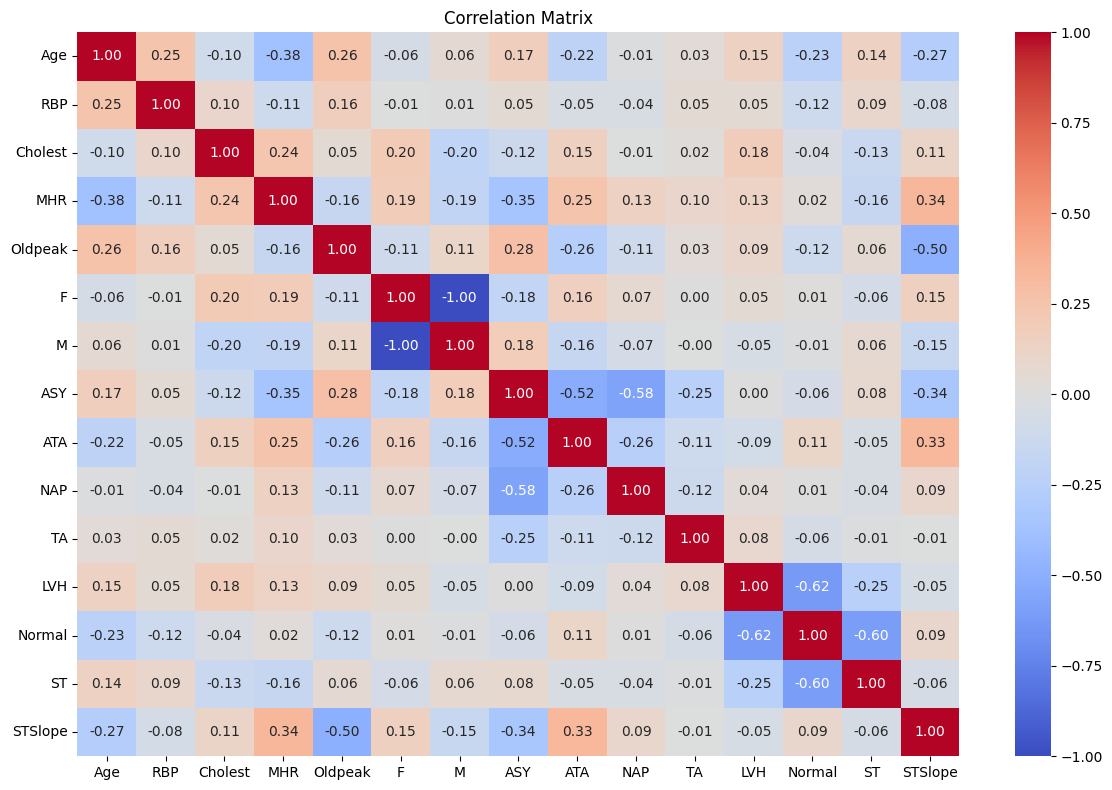

In [233]:
plt.rcdefaults()
# heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
#plt.savefig('corr_matrix.png', format='png', dpi=300)
plt.show()

Looking at the heatmap, it's obvious that there is a low correlation between all features, which is a good sign because it means that our variables are, in fact, independent.

Also, we can plot the distribution of the correlations.

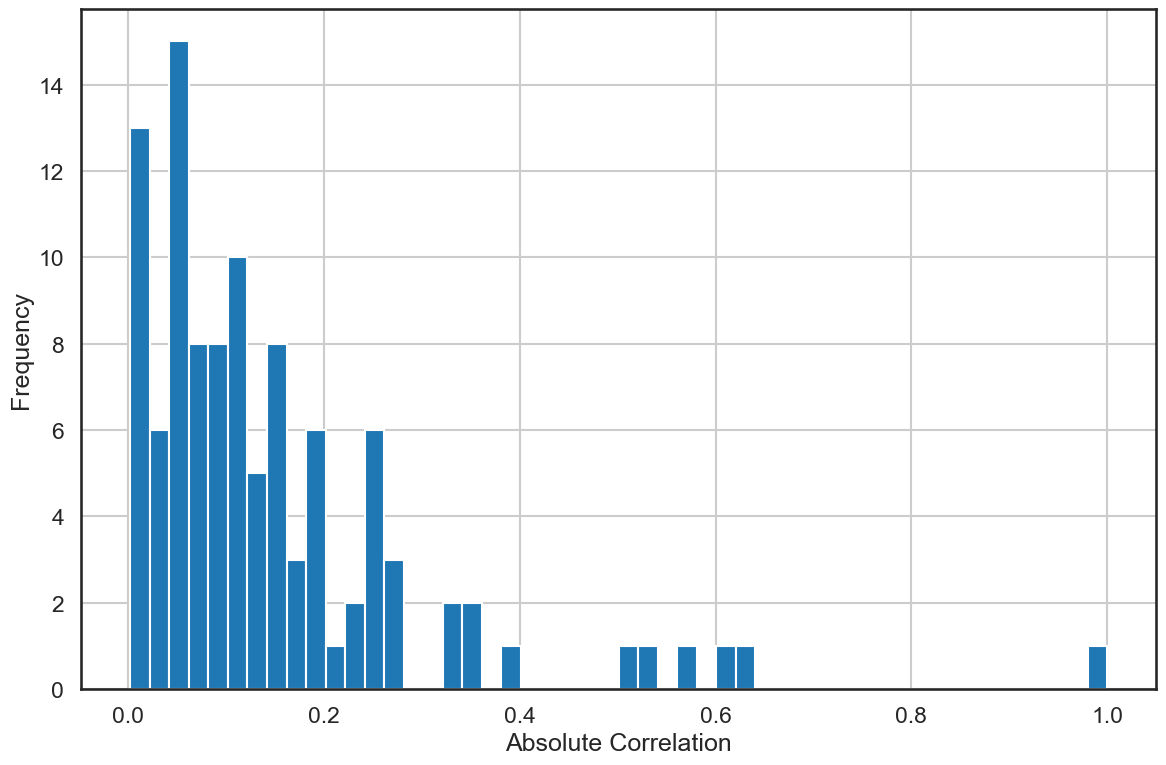

In [234]:
## Deleting the values under the main diagonal because the correlation matrix is symmetric
tril_index = np.tril_indices_from(corr_matrix)
for coord in zip(*tril_index):
    # Setting the elements under the diagonal to nan values
    corr_matrix.iloc[coord[0], coord[1]] = np.nan
corr_values = (corr_matrix
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))
# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

# Plotting the histogram
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency')
plt.tight_layout()
#plt.savefig('corr_hist.png', format='png', dpi=300)
plt.show()

In the same way, we can get the correlations between each feature and the target variable.

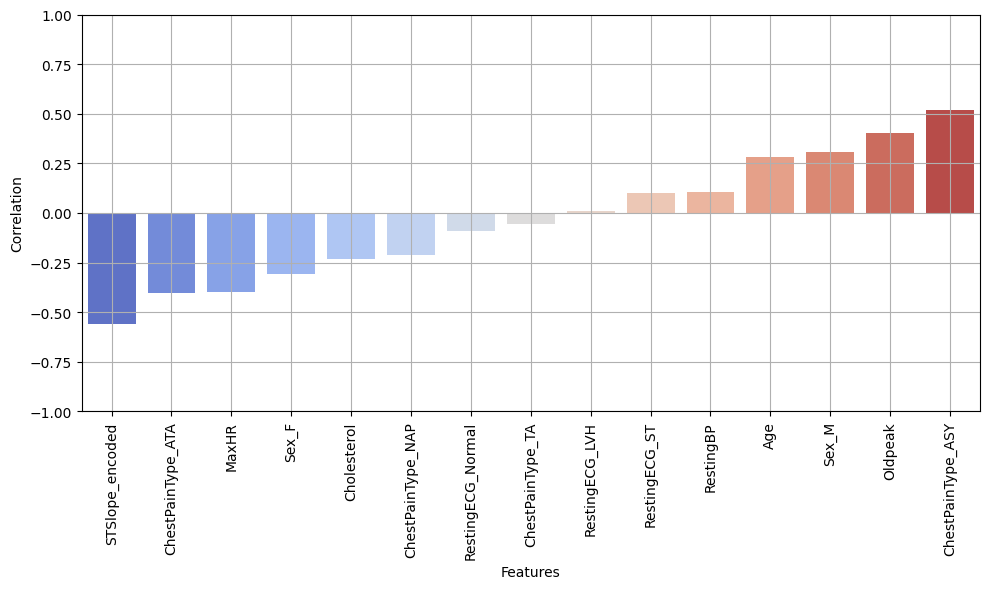

In [235]:
# Selecting the target column
target = df_final.columns[-1]
# Calculating the correlations
corr_target = df_final.corr()[target]
corr_target = corr_target.drop(target)
corr_target = corr_target.sort_values()
# Plotting the results
df_temp = pd.DataFrame({'features': corr_target.index, 'correlation': corr_target.values})

# barchart:
plt.rcdefaults()
plt.figure(figsize=(10, 6))
sns.barplot(x='features', y='correlation',hue='features', data=df_temp, palette='coolwarm')
#plt.title('Individual correlation between the features and the target variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.ylim(-1, 1)  # Ajustar el rango del eje y
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visibilidad
plt.grid()
plt.tight_layout()
#plt.savefig('target_corr.png', format='png', dpi=300)
plt.show()

### 1.4 Conclusion

To conclude this EDA, we can say that:
- The chosen dataset is very clean, with balanced data and no outliers.
- The differentiation of the categorial variables and the numerical features is very clear.
- The independent variables are very well-chose because they have a very low correlation between them, which shows a good variety of features.
- Although each features is slightly correlated to the target variable independentlyng, it does not mean that they cannot predict it.

Therefore, we are in a good position to apply some of the machine learning classification models we have seen throughout the course.

## 2. Applying Machine Learning Models

### 2.1 How to proceed

Now, we are going to apply some machine learning models to our dataset. Specifically, we will apply the main basic models seen during the course: Logistic Regression, K Nearest Neighbors, Support Vector Machines and Decision Trees. We will apply the same process to each one of these model in order to compare them.

To do this, we will use the data set already formatted, that is, normalized and encoded. Let's call this DataFrame as `data`.

In [236]:
data = df_final
data.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,STSlope_encoded,HeartDisease
0,0.244898,0.70,0.479270,0.788732,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0
1,0.428571,0.80,0.298507,0.676056,0.409091,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.5,1
2,0.183673,0.65,0.469320,0.267606,0.295455,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0
3,0.408163,0.69,0.354892,0.338028,0.465909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,1
4,0.530612,0.75,0.323383,0.436620,0.295455,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0


First, we split the features and the target variable.

In [237]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

There are several ways to proceed when applying machine learning models. I will use a cross-validation method to find the best hyperparameters for each model. Concretely, I will use `gridsearchcv`, that do it automatically, combined with `StratifiedShuffleSplit`. After that, I can fit the model and get its scores.

With `StratifiedShuffleSplit` let's create an iterator that generates differents data splits that will be used in the cross-validation process to select the best parameters. With ``train_test_split`` let's create train and test splits that will be used to fit the final model with these best parameters.

In [238]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit, train_test_split

# Creating the split instance
strat_shuf_split = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=10)

# Splitting the data for fit the final models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10, stratify=y)


### 2.2 Logistic Regression

Here we will use `LogisticRegression` class. The parameters we can vary are the penalty and the regularization parameter `C`. So we first set the parameter dictionary:

In [239]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100]
}

Now, let's define the model an apply the cross-validation. As we are considering `l1` and `l2` penalties, we set the `solver` to `"liblinear"`.

In [240]:
from sklearn.linear_model import LogisticRegression

# Model instance:
model = LogisticRegression(solver = "liblinear")

In [241]:
# setting the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=strat_shuf_split, scoring='f1')

# Fitting the model with the whole dataset because we are using gridsearchcv
grid_search.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=10, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='f1')

We can accest to the best parameters and best score using some attributes of the class:

In [242]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:",best_params)
print("Best Score:",best_score)

Best Parameters: {'C': 1, 'penalty': 'l1'}
Best Score: 0.8747604331422767


Finally, we define the final model:

In [243]:
# Final model with the best parameters
LR = LogisticRegression(solver = "liblinear",
                        C = best_params['C'],
                        penalty = best_params['penalty'])

# Fitting it with train data
LR.fit(X_train, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

### 2.3 K Nearest Neighbors

Now, let's do the same process for a KNN model using the `KNeighborsClassifier` class. In this case the possible hyperparameters to tune the model are the number of neighbors, the weights and the metrics.

This time we code all together in the same cell.

In [245]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}


# setting the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=strat_shuf_split, scoring='f1')

# Fitting the model with the whole dataset because we are using gridsearchcv
grid_search.fit(X, y)

# Params and scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:",best_params)
print("Best Score:",best_score)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 0.8678629170135048


In [246]:
# Final model with the best parameters
KNN = KNeighborsClassifier(**best_params)
# Fitting it with all the data
KNN.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')

### 2.4 Support Vector Machines

In this case, we will use the `SVC` class, so the possible hyperparameters we can vary are the regularization parameter `C`, the `kernel`, the parameter `gamma`, and some certain parameters for some kernels, such as the `degree` for the `poly` kernel and the `coef0` coeficent for `poly` or `sigmoid`.

Also, we set `probability = True` in the model instance in order to plot the ROC curve later.

In [247]:
from sklearn.svm import SVC

model = SVC(probability=True)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5, 1.0]
}

# setting the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=strat_shuf_split, scoring='f1')

# Fitting the model with the whole dataset because we are using gridsearchcv
grid_search.fit(X, y)

# Params and scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 100, 'coef0': 0.0, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.8814595276332866


In [248]:
# Final model with the best parameters
SVM = SVC(**best_params, probability=True)
# Fitting it with all the data
SVM.fit(X_train, y_train)

SVC(C=100, degree=2, kernel='linear', probability=True)

### 2.5 Decision Trees

We use `DecisionTreeClassifier`, and the main parameters to vary are the maximum depth and the maximum number of features. As we saw in a demo lab, we can consider these parameters of a certain example to determine the range of values to tune. In fact, we could consider to take its average value.

In [258]:
from sklearn.tree import DecisionTreeClassifier

depths = []
max_features = []
for train_index, test_index in strat_shuf_split.split(X, y):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]
    
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    depths.append(dt.tree_.max_depth)
    max_features.append(len(dt.feature_importances_))

In [259]:
average_depth = int(np.mean(depths))
average_max_features = int(np.mean(max_features))
print(average_depth,average_max_features)

14 15


In [262]:
model = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini'],
    'max_depth':range(1, average_depth + 1, 2),
    'max_features': range(1, average_max_features + 1)}


# setting the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=strat_shuf_split, scoring='f1')

# Fitting the model with the whole dataset because we are using gridsearchcv
grid_search.fit(X, y)

# Params and scores
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:",best_params)
print("Best Score:",best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 13}
Best Score: 0.8694710862621904


In [272]:
DT = DecisionTreeClassifier(**best_params)

DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=13)

We can plot the decision tree.

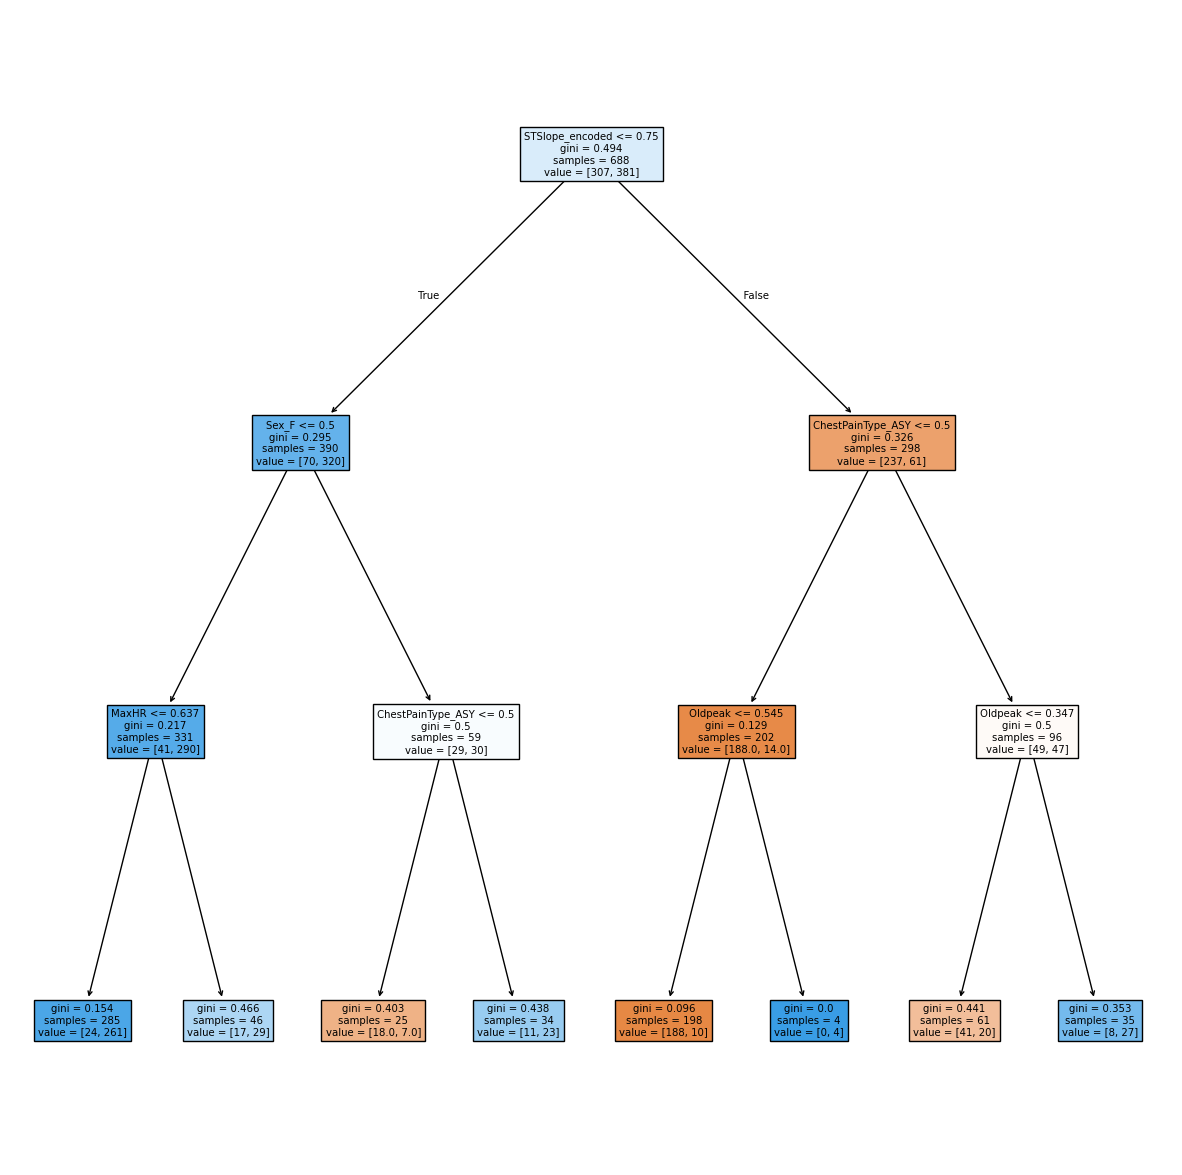

In [273]:
from sklearn.tree import plot_tree

def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(15, 15)) 
    plot_tree(model,
              feature_names=feature_names,
              filled=True)
    plt.show()

feature_names = X.columns
plot_decision_tree(DT, feature_names)

plt.show()

## 3. Visualizing Models

Now, it's time to compare the four models created. To do that, we can use different plots.

### 3.1 ROC Curves

c:\Users\Juanfran\MLPC\Python\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


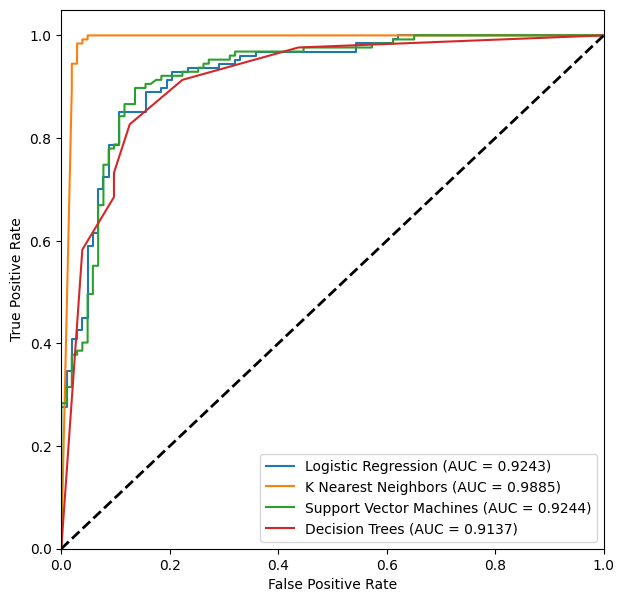

In [266]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

models = [LR, KNN, SVM, DT] 
model_names = ['Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machines', 'Decision Trees']
X_test_df = pd.DataFrame(X_test, columns=feature_names)

plt.figure(figsize=(7, 7))

for model, name in zip(models, model_names):
    y_pred_proba = model.predict_proba(X_test_df)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### 3.2 Confusion Matrix

c:\Users\Juanfran\MLPC\Python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Juanfran\MLPC\Python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Juanfran\MLPC\Python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


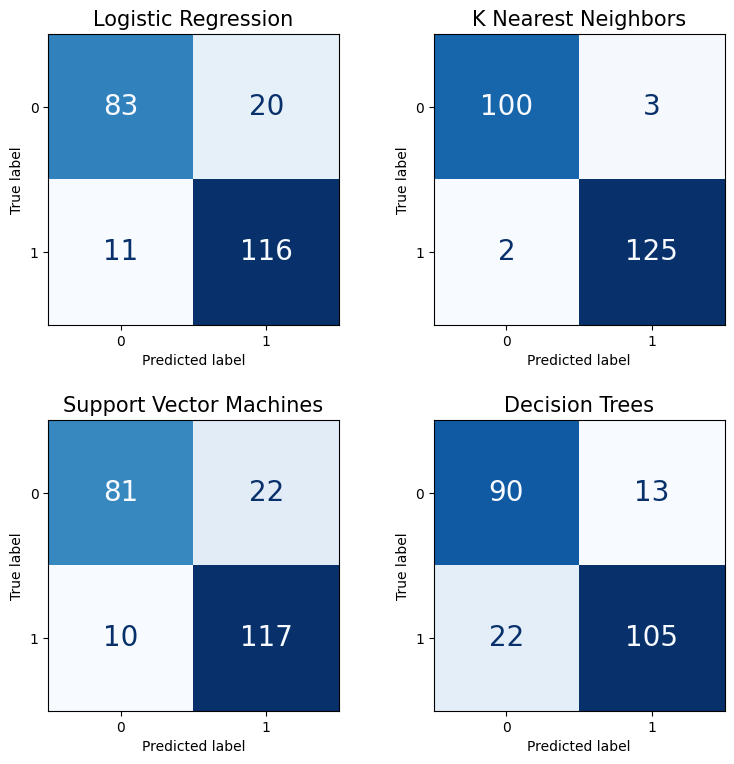

In [267]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


models = [LR, KNN, SVM, DT]
model_names = ['Logistic Regression', 'K Nearest Neighbors', 'Support Vector Machines', 'Decision Trees']

# figure
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Iterating with each model
for model, name, ax in zip(models, model_names, axes.flatten()):
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar = False)
    ax.set_title(name, fontsize = 15)
    for labels in ax.texts:
        labels.set_fontsize(20) 

plt.tight_layout(pad=2.0)
plt.show()

### 3.3 Error Metrics

In [268]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_metrics(model, X_test, y_test):
    yt = y_test
    yp = model.predict(X_test)
    results_pos = {}
    results_pos['Accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['Recall'] = recall
    results_pos['Precision'] = precision
    results_pos['F1 Score'] = f_beta
    return results_pos

In [269]:
metrics_results = {}

for model, name in zip(models, model_names):
    metrics_results[name] = evaluate_metrics(model, X_test, y_test)

c:\Users\Juanfran\MLPC\Python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Juanfran\MLPC\Python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Juanfran\MLPC\Python\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


We can show the metrics in a DataFrame.

In [275]:
error_df = pd.DataFrame(metrics_results).T
error_df

,Accuracy,Recall,Precision,F1 Score
Logistic Regression,0.865217,0.913386,0.852941,0.882129
K Nearest Neighbors,0.978261,0.984252,0.976562,0.980392
Support Vector Machines,0.860870,0.921260,0.841727,0.879699
Decision Trees,0.847826,0.826772,0.889831,0.857143


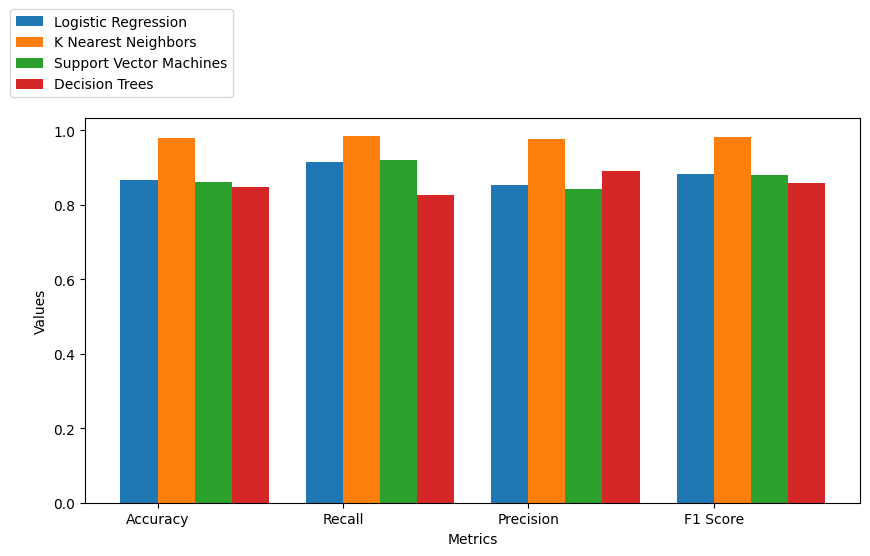

In [279]:
import matplotlib.pyplot as plt
import numpy as np

metrics_names = ['Accuracy', 'Recall', 'Precision', 'F1 Score']
x = np.arange(len(metrics_names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 5))

for i, (name, metrics) in enumerate(metrics_results.items()):
    values = [metrics[metric] for metric in metrics_names]
    ax.bar(x + i*width, values, width, label=name)

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
#ax.set_title('Metric Error Comparison')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(metrics_names)
ax.legend(loc='upper right', bbox_to_anchor=(0.2, 1.3))

plt.show()


### 3.4 To conclude

Looking at these graphs, we can say that KNN is the one that has made the best predictions, while the other three models are very evenly matched.
- Looking at the ROC curves, we see that the area for KNN is very close to 1, for the others it is around 0.92.
- Regarding the confusion matrix, KNN is the best at predicting both positive and negative outcomes. Logistic Regression and SVM are practically the same; and comparing them with Decision Trees, we see that the first two are more successful at predicting negative outcomes, while Decision Trees is better at predicting positive outcomes.
- Looking at the error metrics. KNN is better in all of them, while the other models are around the same values.